<a href="https://colab.research.google.com/github/bongomarcel/CERI_Pandas/blob/main/Lecture_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

A high-level overview of the [Pandas](https://pandas.pydata.org) library.

We will cover the following in this crash course:
1. Key data structures and indexing
2. Working with columns and sorting
3. Groupby.agg & Groupby.filter paradigms
4. Merging data

Also provided are:
1. Self-study: How to write efficient Pandas code
2. Practical (+Memo) on all the above

---
## Reading in DataFrames from Files

In [1]:
! git clone https://github.com/bongomarcel/CERI_Pandas.git


Cloning into 'CERI_Pandas'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 75 (delta 30), reused 36 (delta 8), pack-reused 0
Receiving objects: 100% (75/75), 7.57 MiB | 23.07 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [2]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

Pandas has a number of very useful file reading tools `pd.re*`.
* pd.read_json()
* pd.read_table()
* pd.read_xml()
* pd.read_sql()
* pd.read_html()

In [ ]:
%pwd

'/content'

In [ ]:
%cd CERI_Pandas

/content/CERI_Pandas


In [ ]:
! pip install pdf2image

In [ ]:
elections = pd.read_csv("./data/elections.csv")
elections # if we end a cell with an expression or variable name, the result will print

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_image(path_to_image, width=800, height=350):
    img = open(path_to_image.lower(), 'rb').read()
    data_url = 'data:image/png;base64,' + b64encode(img).decode()
    display(HTML("<img src='%s' %s%s>" % (data_url, "width='%d'" % (width), "height='%d'" % (height))))


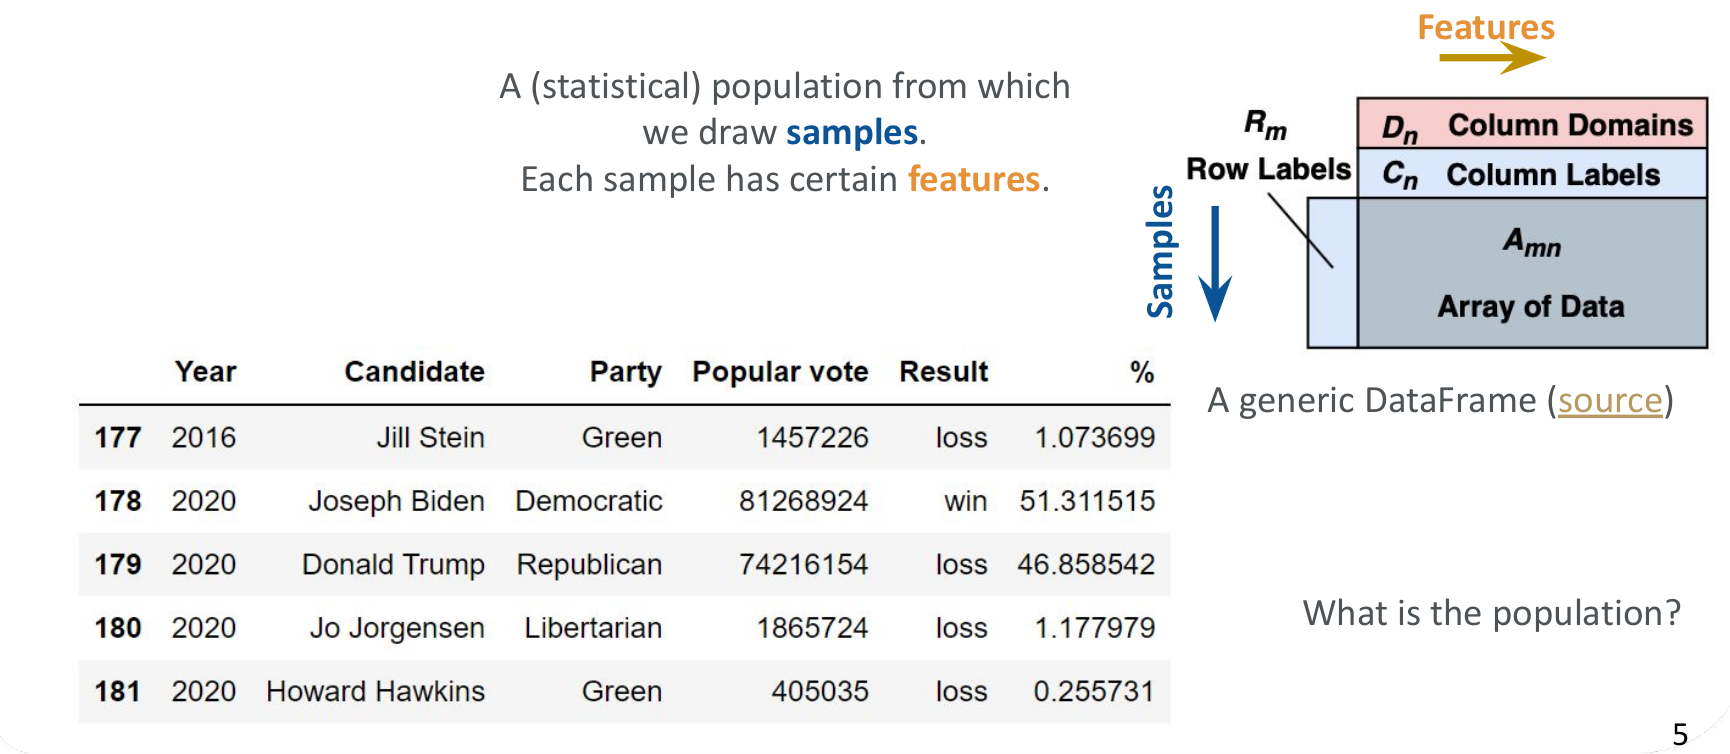

In [ ]:
show_image('./slides/slide05.png', 800, 350)

The Pandas library has a lot of “syntactic sugar”. For example, we can also use the ``head`` command to return only a few rows of a dataframe.

In [ ]:
# elections.tail(5) # tail command to get the last so many rows.
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


---
## Indexing into Data
### The `.loc` operator
``loc`` selects items by row and column label.

As a simple indexing example using the ``loc`` operator, consider the code below which returns the first 5 rows of the DataFrame.  



In [ ]:
elections.loc[0:4]

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


If we want a subset of the columns, we can also use ``loc`` just to ask for those.

In [ ]:
elections.loc[0:4, "Year":"Party"]

,Year,Candidate,Party
0,1824,Andrew Jackson,Democratic-Republican
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican
4,1832,Andrew Jackson,Democratic


In [ ]:
# Using *list* of column and row labels
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
87,1932,Herbert Hoover,loss
25,1860,John C. Breckinridge,loss
179,2020,Donald Trump,loss


In [ ]:
# Using a *slice* (syntax is inclusive of the right hand side of slice
elections.loc[[87, 25, 179], "Popular vote":"%"]

,Popular vote,Result,%
87,15761254,loss,39.830594
25,848019,loss,18.138998
179,74216154,loss,46.858542


In [ ]:
# Using a *single value*
elections.loc[[87, 25, 179], "Popular vote"]

87     15761254
25       848019
179    74216154
Name: Popular vote, dtype: int64

In [ ]:
type(elections.loc[[87, 25, 179], "Popular vote"])

pandas.core.series.Series

In [ ]:
# Omit the second row if you want all columns
# Use the : (full slice) if you want all rows
elections.loc[:, ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss


---
### The `iloc` operator


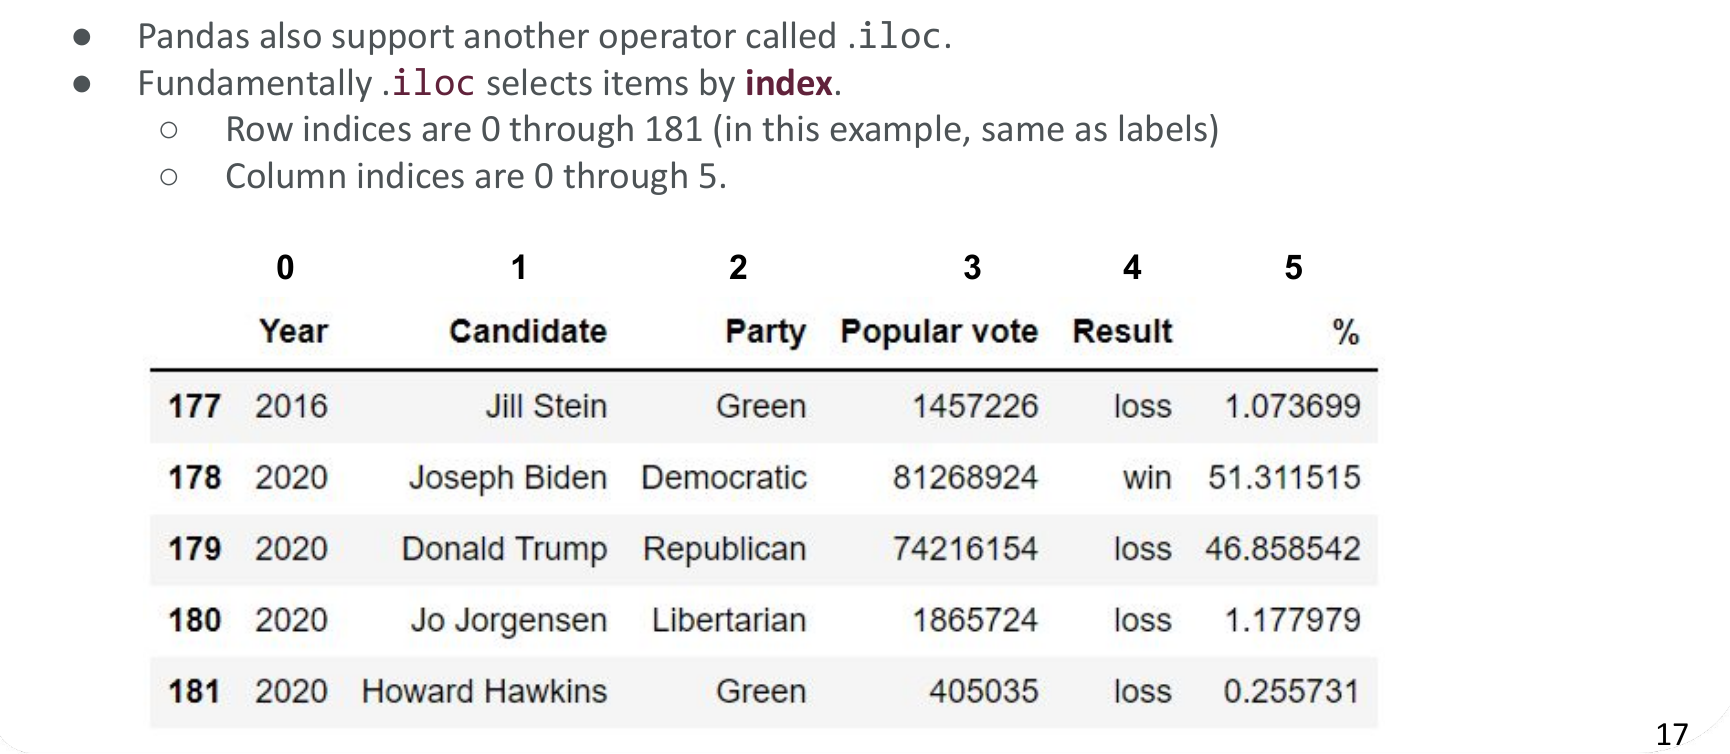

In [ ]:
show_image('./slides/slide17.png', 800, 350)

``iloc`` selects items by row and column number.

In [ ]:
elections.iloc[[1, 2, 3], [0, 1, 2]]

,Year,Candidate,Party
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican


In [ ]:
elections.iloc[[1, 2, 3], 0:2]

,Year,Candidate
1,1824,John Quincy Adams
2,1828,Andrew Jackson
3,1828,John Quincy Adams


In [ ]:
elections.iloc[[1, 2, 3], 1]

1    John Quincy Adams
2       Andrew Jackson
3    John Quincy Adams
Name: Candidate, dtype: object

In [ ]:
elections.iloc[:, [0, 1, 4]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss



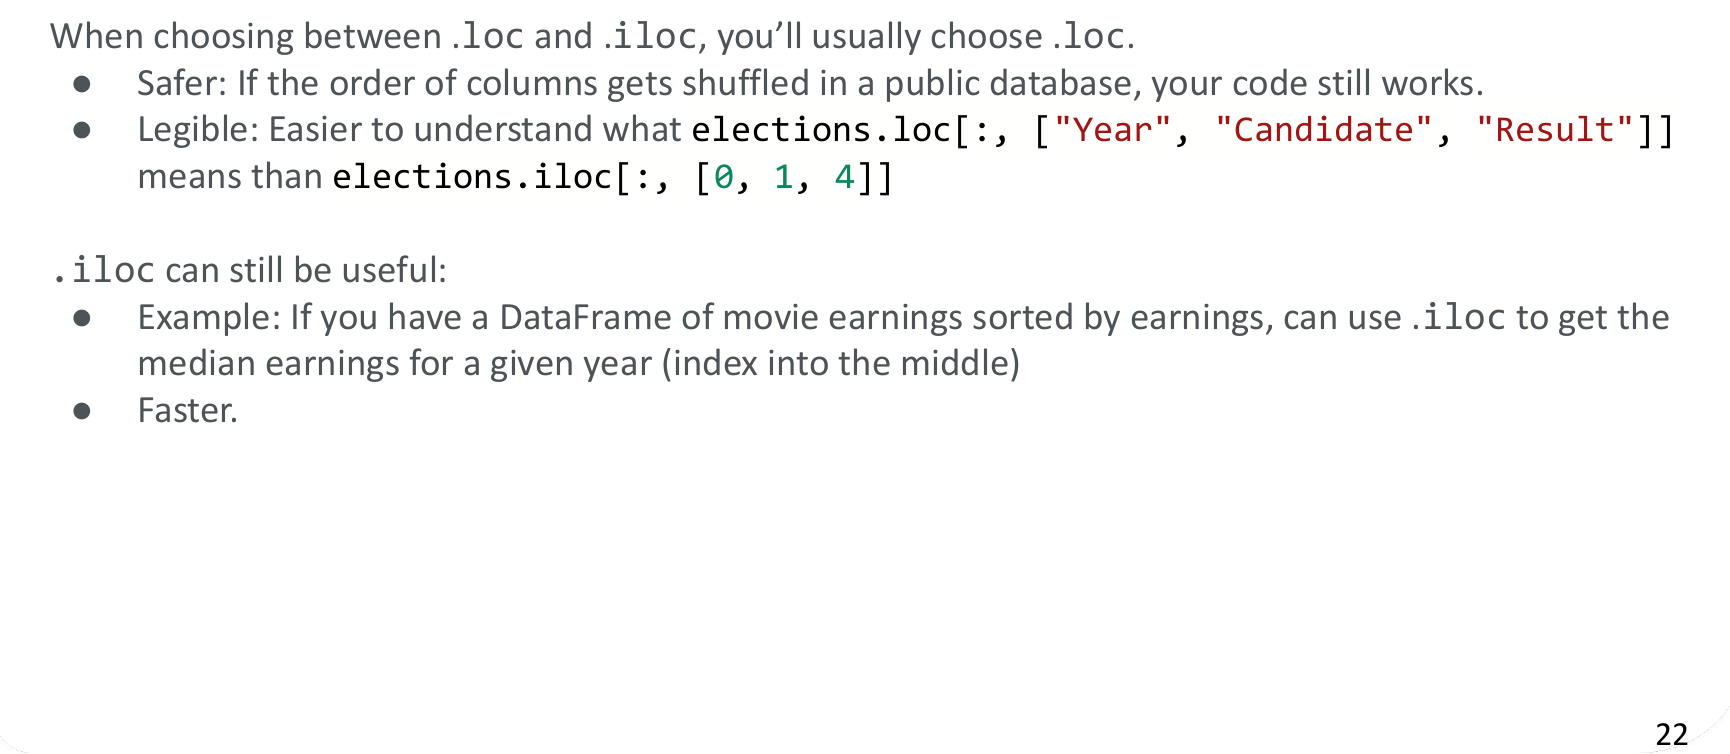

In [ ]:
show_image('./slides/slide22.png', 800, 350)

---
### The `[]` operator

We could technically do anything we want using `.loc` or `.iloc`. However, in practice, the `[]` operator is often used instead to yield more concise code.

`[]` is a bit trickier to understand than `.loc` or `.iloc`, but it does essentially the same thing.


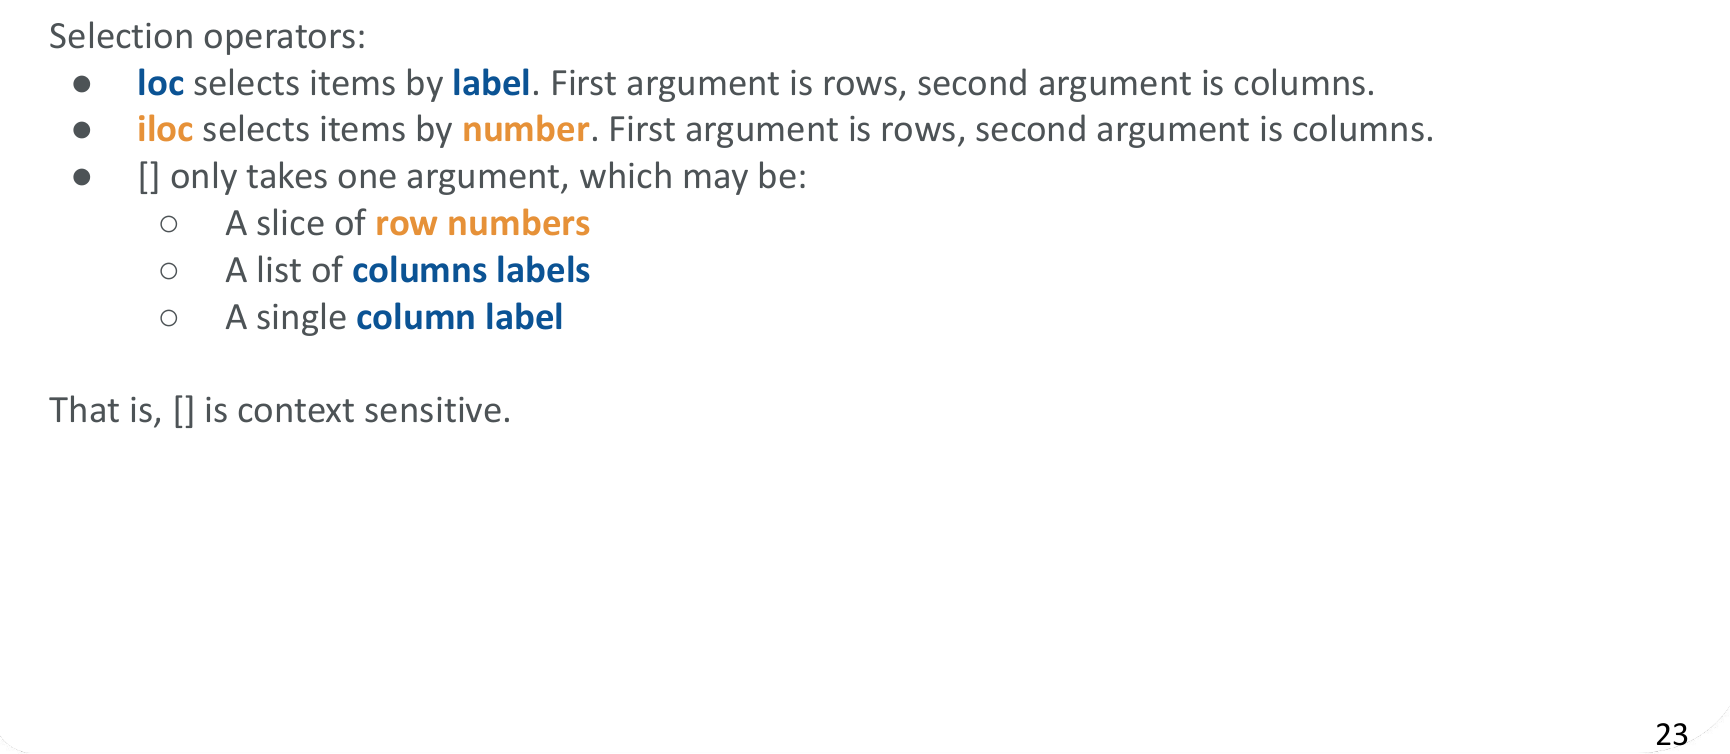

In [ ]:
show_image('./slides/slide23.png', 800, 350)

If we provide a slice of row numbers, we get the numbered rows.

In [ ]:
elections[3:7]

,Year,Candidate,Party,Popular vote,Result,%
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
5,1832,Henry Clay,National Republican,484205,loss,37.603628
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583


If we provide a list of column names, we get the listed columns.

In [ ]:
elections[["Year", "Candidate", "Result"]].tail(5)

,Year,Candidate,Result
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss
181,2020,Howard Hawkins,loss


And if we provide a single column name we get back just that column.

In [ ]:
elections["Candidate"].tail(5)

177        Jill Stein
178      Joseph Biden
179      Donald Trump
180      Jo Jorgensen
181    Howard Hawkins
Name: Candidate, dtype: object

In [ ]:
# Puzzle
weird = pd.DataFrame({
    1:["topdog","botdog"],
    "1":["topcat","botcat"]
})
weird

,1,1
0,topdog,topcat
1,botdog,botcat


In [ ]:
weird[1] #try to predict the output

0    topdog
1    botdog
Name: 1, dtype: object

In [ ]:
weird["1"] #try to predict the output

0    topcat
1    botcat
Name: 1, dtype: object

In [ ]:
weird[1:] #try to predict the output

,1,1
1,botdog,botcat


---
## Pandas Datastructures: DataFrames, Series, and Indices


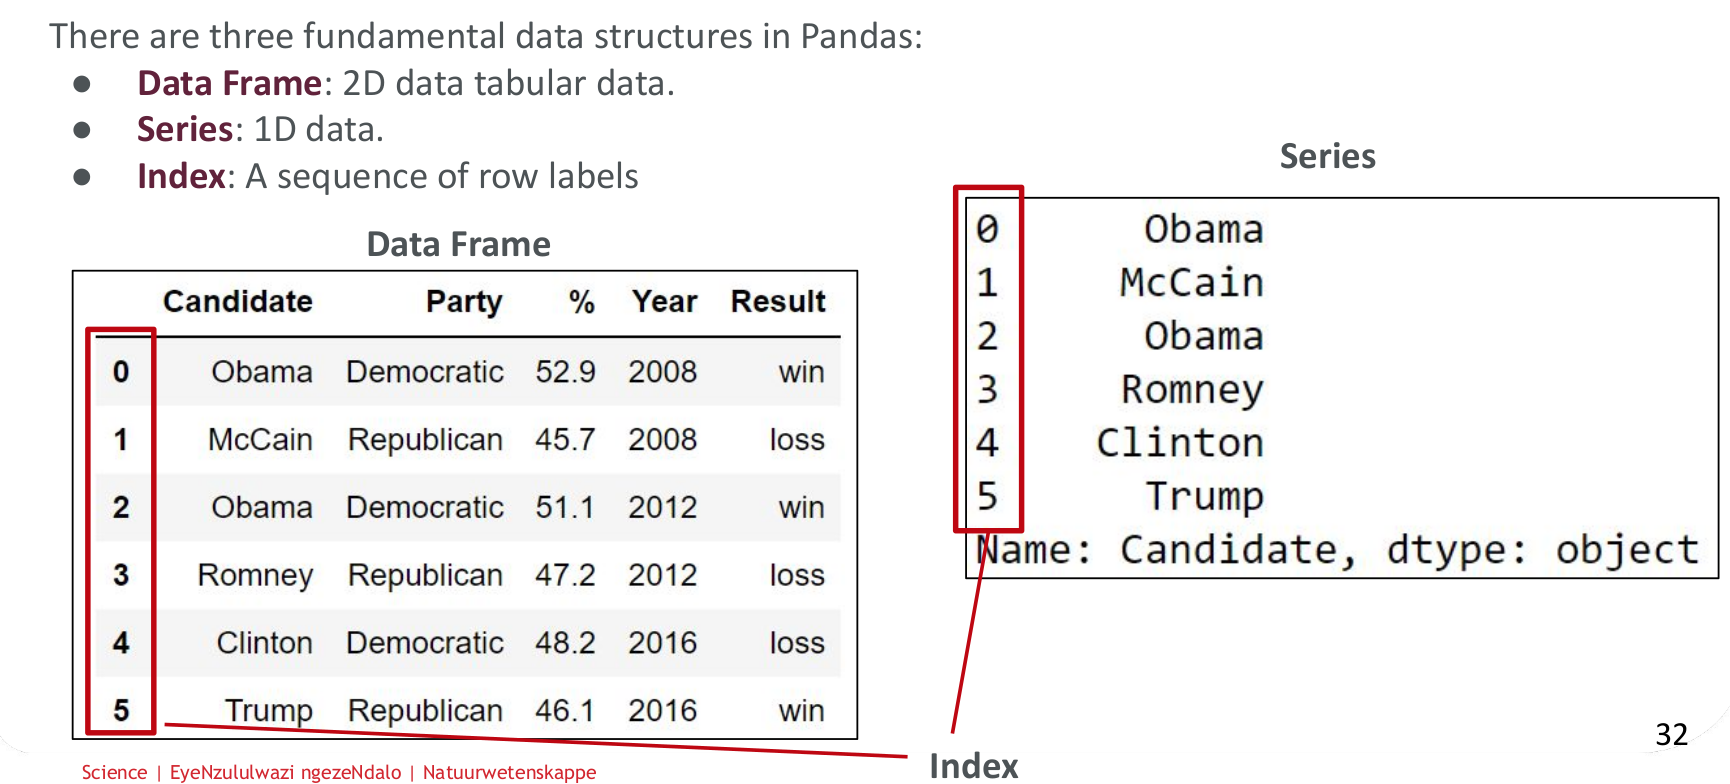

In [ ]:
show_image('./slides/slide32.png', 800, 350)

In [ ]:
type(elections)

pandas.core.frame.DataFrame

In [ ]:
type(elections["Candidate"])

pandas.core.series.Series

In [ ]:
# Example of index values that non-numeric that might not be unique
mottos = pd.read_csv("./data/mottos.csv", index_col = "State")
mottos.loc["Alabama":"California"]

,Motto,Translation,Language,Date Adopted
State,,,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!,Latin,1923
Alaska,North to the future,—,English,1967
Arizona,Ditat Deus,God enriches,Latin,1863
Arkansas,Regnat populus,The people rule,Latin,1907
California,Eureka (Εὕρηκα),I have found it,Greek,1849


In [ ]:
# Example of typical numeric row labels (as row numbers they will be unique)
elections["Candidate"].tail(5).to_frame()

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [ ]:
# Example of forcing a dataframe to be returned
elections[["Candidate"]].tail(5)

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [ ]:
# Indexes are
mottos.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [ ]:
# Columns are almost always unique (you really have to hack to achieve non-uniqueness)
mottos.columns

Index(['Motto', 'Translation', 'Language', 'Date Adopted'], dtype='object')

## Conditional Selection


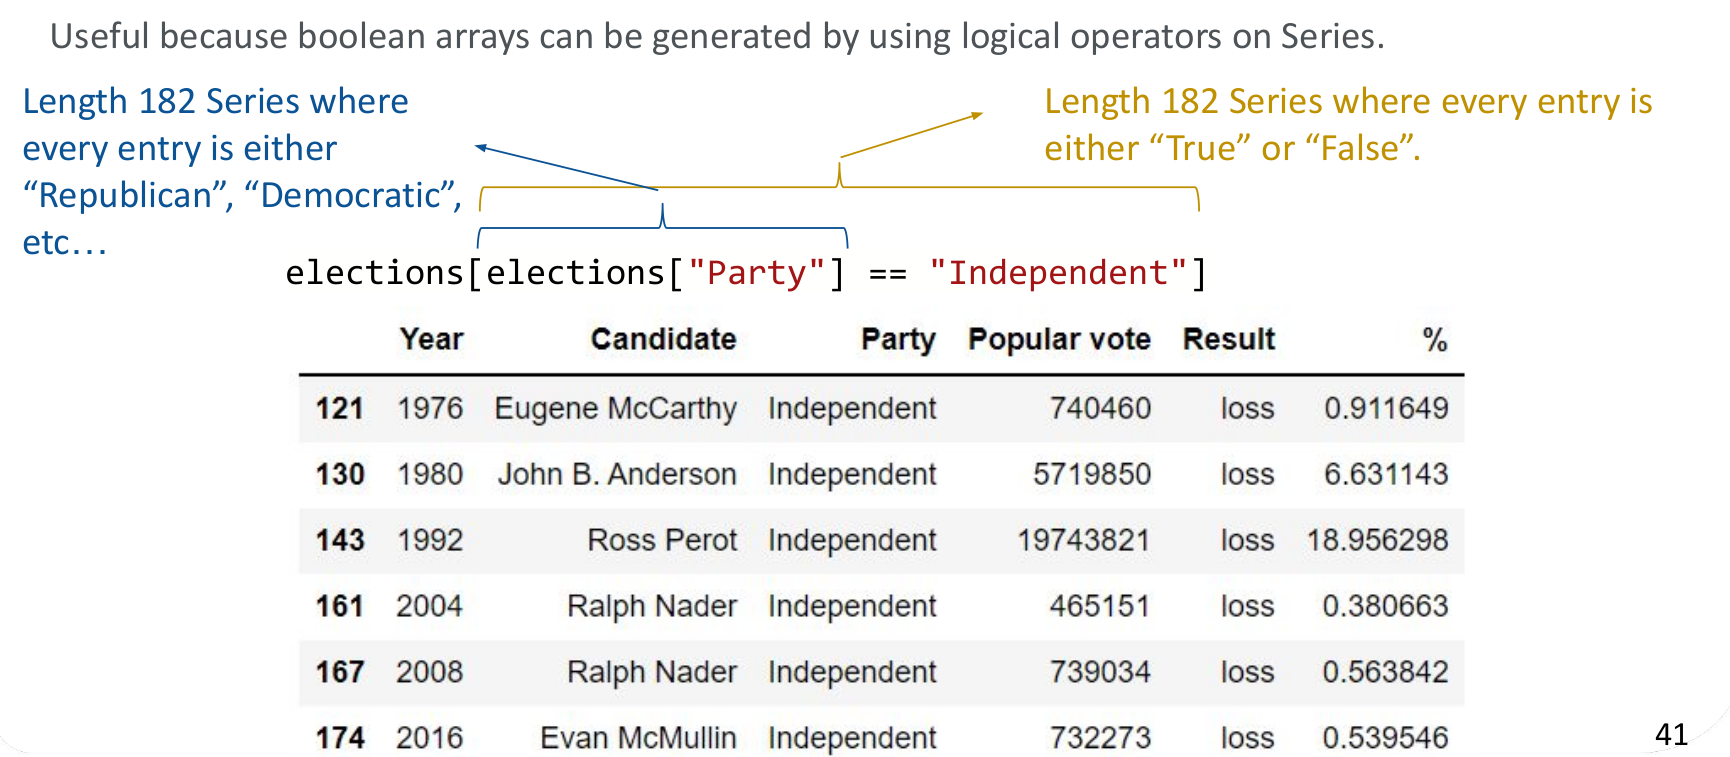

In [ ]:
show_image('./slides/slide41.png', 800, 350)

In [ ]:
elections[elections["Party"] == "Independent"]

,Year,Candidate,Party,Popular vote,Result,%
121,1976,Eugene McCarthy,Independent,740460,loss,0.911649
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


In [ ]:
elections["Party"] == "Independent"

0      False
1      False
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
180    False
181    False
Name: Party, Length: 182, dtype: bool

Boolean array selection also works with `loc`!

In [ ]:
elections.loc[elections["Party"] == "Independent"]

,Year,Candidate,Party,Popular vote,Result,%
121,1976,Eugene McCarthy,Independent,740460,loss,0.911649
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


In [ ]:
elections[(elections["Result"] == "win") & (elections["%"] < 47)]

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
20,1856,James Buchanan,Democratic,1835140,win,45.306080
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
47,1892,Grover Cleveland,Democratic,5553898,win,46.121393
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
117,1968,Richard Nixon,Republican,31783783,win,43.565246
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
173,2016,Donald Trump,Republican,62984828,win,46.407862


In [ ]:
(
    elections[(elections["Party"] == "Anti-Masonic")  |
              (elections["Party"] == "American")      |
              (elections["Party"] == "Anti-Monopoly") |
              (elections["Party"] == "American Independent")]
)
#Note: The parentheses surrounding the code make it possible to break the code on to multiple lines for readability

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
a_parties = ["Anti-Masonic", "American", "Anti-Monopoly", "American Independent"]
elections[elections["Party"].isin(a_parties)]

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
elections[elections["Party"].str.startswith("A")]

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
# Example of sql-type queries
elections.query('Year >= 2000 and Result == "win"')

,Year,Candidate,Party,Popular vote,Result,%
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
173,2016,Donald Trump,Republican,62984828,win,46.407862
178,2020,Joseph Biden,Democratic,81268924,win,51.311515


In [ ]:
# Example of refering to variables in current scope
parties = ["Republican", "Democratic"]
elections.query('Result == "win" and Party not in @parties')

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
16,1848,Zachary Taylor,Whig,1360235,win,47.309296
27,1864,Abraham Lincoln,National Union,2211317,win,54.951512


---
## Built In Functions

In [ ]:
winners = elections.query('Result == "win"')["%"]
winners.head(5)

1     42.789878
2     56.203927
4     54.574789
8     52.272472
11    53.051213
Name: %, dtype: float64

In [ ]:
# Integrates nicely with numpy
np.mean(winners)

51.711492939

In [ ]:
# and python built-in function
max(winners)

61.34470329

In [ ]:
elections.size

1092

In [ ]:
elections.shape

(182, 6)

In [ ]:
elections.describe()

,Year,Popular vote,%
count,182.000000,1.820000e+02,182.000000
mean,1934.087912,1.235364e+07,27.470350
std,57.048908,1.907715e+07,22.968034
min,1824.000000,1.007150e+05,0.098088
25%,1889.000000,3.876395e+05,1.219996
50%,1936.000000,1.709375e+06,37.677893
75%,1988.000000,1.897775e+07,48.354977
max,2020.000000,8.126892e+07,61.344703


In [ ]:
elections.sample(5).iloc[:, 0:2]

,Year,Candidate
181,2020,Howard Hawkins
180,2020,Jo Jorgensen
112,1960,Richard Nixon
12,1844,Henry Clay
119,1972,John G. Schmitz


In [ ]:
elections.query('Year == 2000').sample(4, replace = True).iloc[:, 0:2]

,Year,Candidate
154,2000,Pat Buchanan
151,2000,Al Gore
155,2000,Ralph Nader
152,2000,George W. Bush


In [ ]:
elections["Candidate"].value_counts()

Norman Thomas         5
Ralph Nader           4
Franklin Roosevelt    4
Eugene V. Debs        4
Andrew Jackson        3
                     ..
Silas C. Swallow      1
Alton B. Parker       1
John G. Woolley       1
Joshua Levering       1
Howard Hawkins        1
Name: Candidate, Length: 132, dtype: int64

In [ ]:
elections["Party"].unique()

array(['Democratic-Republican', 'Democratic', 'National Republican',
       'Anti-Masonic', 'Whig', 'Free Soil', 'Republican', 'American',
       'Constitutional Union', 'Southern Democratic',
       'Northern Democratic', 'National Union', 'Liberal Republican',
       'Greenback', 'Anti-Monopoly', 'Prohibition', 'Union Labor',
       'Populist', 'National Democratic', 'Socialist', 'Progressive',
       'Farmer–Labor', 'Communist', 'Union', 'Dixiecrat',
       "States' Rights", 'American Independent', 'Independent',
       'Libertarian', 'Citizens', 'New Alliance', 'Taxpayers',
       'Natural Law', 'Green', 'Reform', 'Constitution'], dtype=object)

In [ ]:
elections["Candidate"].sort_values()

75           Aaron S. Watkins
27            Abraham Lincoln
23            Abraham Lincoln
108           Adlai Stevenson
105           Adlai Stevenson
                ...          
19             Winfield Scott
37     Winfield Scott Hancock
74             Woodrow Wilson
70             Woodrow Wilson
16             Zachary Taylor
Name: Candidate, Length: 182, dtype: object

In [ ]:
elections.sort_values("%", ascending = False)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
...,...,...,...,...,...,...
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
141,1992,Bo Gritz,Populist,106152,loss,0.101918


---
## Chained indexing
The flexibility of pandas allows for chained indexing, where you can repeatedly index the outcome of a previous indexing operation. [Source](https://towardsdatascience.com/settingwithcopywarning-in-pandas-782e4aa54ff7)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10],
    }, index=range(5)
    )
df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [ ]:
# Example of causing a Pandas chained assignment warning
dfa = df.loc[3:5]
dfa["C"] = dfa["B"] * 50

/tmp/ipykernel_359/914266719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["C"] = dfa["B"] * 50


In [ ]:
print(dfa)
print(df)

   A   B    C
3  4   9  450
4  5  10  500
   A   B
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


Note:
* The value assignment did occur.
* Did you expect the contents of `df` to be affected by the value assignment in dfa?
* Pandas has internally consistent (albeit obtuse) rules on whether that happens or not. It’s just that the ambiguity in user expectations present in this situation warrants a warning, so that end users like you and me know where to look when our code misbehaves.

When indexing and selecting data Pandas will return either a __view__ or a __copy__ of a dataframe. A view (shallow copy) references data from the original dataframe, while a copy (deep copy) is a separate instance of the same data.

It is difficult to predict which will be returned by the indexing operation, as it depends on the memory layout of the underlying array. How exactly the indexing is chained can lead to different `__getitem__` and `__setitem__` calls being issued under the hood. Let's consider the following example: [Source](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [ ]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [ ]:
dfmi.loc[:, ('one', 'second')] = 'z1'
# becomes
# dfmi.loc.__setitem__((slice(None), (‘one’, ‘second’)), value)
dfmi

one          two       
  first second first second
0     a     z1     c      d
1     e     z1     g      h
2     i     z1     k      l
3     m     z1     o      p

In [ ]:
dfmi['one']['second'] = 'z2'
# becomes
#dfmi.__getitem__(‘one’).__setitem__(‘second’, value)

/tmp/ipykernel_359/1355793736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmi['one']['second'] = 'z2'


In [ ]:
dfmi

one          two       
  first second first second
0     a     z1     c      d
1     e     z1     g      h
2     i     z1     k      l
3     m     z1     o      p

Notice the `__getitem__`? Outside of simple cases, it’s very hard to predict whether it will return a view or a copy (it depends on the memory layout of the array, about which pandas makes no guarantees), and therefore whether the `__setitem__` will modify `dfmi` or a temporary object that gets thrown out immediately afterward. That’s what `SettingWithCopy` is warning you about.

If you need to update multiple items, it is recommended to use `.loc` as access method with a mask.

In [ ]:
dfc = pd.DataFrame({'a': ['one', 'one', 'two',
                          'three', 'two', 'one', 'six'],
                    'c': range(7)})

dfd = dfc.copy()

# Setting multiple items using a mask
mask = dfd['a'].str.startswith('o')

dfd.loc[mask, 'c'] = 42

dfd

,a,c
0,one,42
1,one,42
2,two,2
3,three,3
4,two,4
5,one,42
6,six,6


# Data Processing with Pandas
This notebook covers more advanced Pandas syntax such as sorting, aggregation, and joining.

## Working with columns and sorting

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly

In [ ]:
# Let's load the babynames data.
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
babynames = pd.read_csv('./data/CA.TXT', header=None, names=field_names)
babynames.sample(5)

,State,Sex,Year,Name,Count
375602,CA,M,2013,Brodie,30
1369,CA,F,1914,Margarita,9
183914,CA,F,2008,Apple,7
322592,CA,M,1993,Ameer,10
379136,CA,M,2014,Abdulaziz,12


In [ ]:
(
    babynames.query('Sex == "M" and Year == 2020')
.sort_values("Count", ascending = False)
)

,State,Sex,Year,Name,Count
395116,CA,M,2020,Noah,2625
395117,CA,M,2020,Liam,2420
395118,CA,M,2020,Mateo,2073
395119,CA,M,2020,Sebastian,1994
395120,CA,M,2020,Julian,1687
...,...,...,...,...,...
397667,CA,M,2020,Gannon,5
397666,CA,M,2020,Galen,5
397665,CA,M,2020,Fitzgerald,5
397664,CA,M,2020,Fermin,5


In [ ]:
(babynames.query('Sex == "M" and Year == 2020').sort_values("Name", ascending = False)
)

,State,Sex,Year,Name,Count
396944,CA,M,2020,Zyon,9
397908,CA,M,2020,Zymir,5
397074,CA,M,2020,Zyan,8
395829,CA,M,2020,Zyaire,37
396553,CA,M,2020,Zyair,13
...,...,...,...,...,...
396824,CA,M,2020,Aamir,9
397550,CA,M,2020,Aalam,5
397076,CA,M,2020,Aaditya,7
397075,CA,M,2020,Aadi,7


Let's say we wanted to sort the baby names by the length of the names. We can use a lambda expression and pass that to `.sort_values`'s key parameter.

In [ ]:
(
babynames.query('Sex == "M" and Year == 2020')
         .sort_values("Name", key = lambda x: x.str.len(),#str.len(),
                      ascending = False)
)

,State,Sex,Year,Name,Count
397199,CA,M,2020,Michaelangelo,7
396683,CA,M,2020,Michelangelo,11
396682,CA,M,2020,Maximilliano,11
396623,CA,M,2020,Abdulrahman,11
395166,CA,M,2020,Christopher,758
...,...,...,...,...,...
397745,CA,M,2020,Ky,5
397121,CA,M,2020,Cj,7
396001,CA,M,2020,Ty,25
397401,CA,M,2020,Jj,6


---

An alternate approach is to create a temporary column corresponding to the length. We call this column `name_lengths`. This approach would have been neccessary before the `key` functionality was added to `.sort_values()`.

In [ ]:
#create a new series of only the lengths
babyname_lengths = babynames["Name"].str.len()

#add that series to the dataframe as a column
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [ ]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(25)

,State,Sex,Year,Name,Count,name_lengths
313143,CA,M,1989,Franciscojavier,6,15
333732,CA,M,1997,Ryanchristopher,5,15
330421,CA,M,1996,Franciscojavier,8,15
323615,CA,M,1993,Johnchristopher,5,15
310235,CA,M,1988,Franciscojavier,10,15
323728,CA,M,1993,Ryanchristopher,5,15
308802,CA,M,1987,Franciscojavier,5,15
340695,CA,M,2000,Franciscojavier,6,15
102498,CA,F,1986,Mariadelosangel,5,15
318170,CA,M,1991,Franciscojavier,6,15


When dropping columns we need to specify `axis = "columns"` since by default `.drop()` will try and drop rows with matching row labels.

In [ ]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis = 'columns')
babynames.head(5)

,State,Sex,Year,Name,Count
313143,CA,M,1989,Franciscojavier,6
333732,CA,M,1997,Ryanchristopher,5
330421,CA,M,1996,Franciscojavier,8
323615,CA,M,1993,Johnchristopher,5
310235,CA,M,1988,Franciscojavier,10


We can also use the Python `map()` function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [ ]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

#create the temporary column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

#sort by the temporary column
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
101969,CA,F,1986,Deandrea,6,3
304390,CA,M,1985,Deandrea,6,3
131022,CA,F,1994,Leandrea,5,3
115950,CA,F,1990,Deandrea,5,3
108723,CA,F,1988,Deandrea,5,3


In [ ]:
#drop that column
babynames = babynames.drop("dr_ea_count", axis = "columns")
babynames.head(5)

,State,Sex,Year,Name,Count
101969,CA,F,1986,Deandrea,6
304390,CA,M,1985,Deandrea,6
131022,CA,F,1994,Leandrea,5
115950,CA,F,1990,Deandrea,5
108723,CA,F,1988,Deandrea,5


---
### Closer look at the `Series.map` functionality

`Series.map(arg, na_action=None)`
Map values of Series according to an input mapping or function.

Used for substituting each value in a Series with another value, that may be derived from a function, a `dict` or a `Series`.

**Parameters:
arg : *function, collections.abc.Mapping subclass or Series*** Mapping correspondence.  
**na_action : *{None, ‘ignore’}, default None*** If 'ignore', propagate NaN values, without passing them to the mapping correspondence.

**Returns: Series** Same index as caller.

In [ ]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

`map` accepts a `dict` or a `Series`. Values that are not found in the `dict` are converted to `NaN`, unless the `dict` has a default value (e.g. defaultdict). Below is a dictionary mapping example.

In [ ]:
s.map({'cat': 'kitten', 'dog': 'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [ ]:
def plural(pet):
    return pet + 's'

s.map(plural)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
def plural2(pet):
    return pet + 's'
s.map(plural2, na_action='ignore')

0       cats
1       dogs
2        NaN
3    rabbits
dtype: object

Example of using `defaultdict` in the map function.

In [ ]:
from collections import defaultdict
cutify = defaultdict(lambda: "extinct")
cutify['dog'] = 'puppy'
cutify['cat'] = 'kitten'
s.map(cutify)

0     kitten
1      puppy
2    extinct
3    extinct
dtype: object

### Further reading:
- [`Series.apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html#pandas.Series.apply) for more complex functions on a Series.  
- [`DataFrame.apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) allows you to apply a function row-/column-wise.  
- [`DataFrame.applymap`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html#pandas.DataFrame.applymap) allows you to apply a function elementwise on a whole DataFrame.  


---

## Female Name whose popularity has dropped the most.
Let's find the female name whose popularity has dropped the most since its peak. As an example of a name that has fallen into disfavor, consider "Jennifer", visualized below.

In [ ]:
babynames = babynames.sort_values("Year")
sorted_jens = babynames.query("Name == 'Jennifer' and Sex == 'F'")
sorted_jens.head(10)

,State,Sex,Year,Name,Count
13610,CA,F,1934,Jennifer,5
16325,CA,F,1938,Jennifer,5
16993,CA,F,1939,Jennifer,6
17533,CA,F,1940,Jennifer,13
18210,CA,F,1941,Jennifer,24
19087,CA,F,1942,Jennifer,22
19953,CA,F,1943,Jennifer,30
20810,CA,F,1944,Jennifer,80
21786,CA,F,1945,Jennifer,99
22799,CA,F,1946,Jennifer,147


There seems to be an issue to simply display plotly or plotly express figures in a Jupyter Notebook. For more information on how to set up your notebooks to show figures in-line, see [this link](https://plotly.com/python/renderers/). As a workaround, we will export the figures as external html documents. Note, that you might have to press the button "Trust HTML" to show the html document's content.

In [ ]:
fig = px.line(sorted_jens, x = "Year", y = "Count")
fig.update_layout(font_size = 18)


To answer this question, we'll need a mathematical definition for the change in popularity of a name.

For the purposes of lecture, let’s use the RTP or ratio_to_peak. This is the current count of the name divded by its maximum ever count.

Getting the max Jennifer is easy enough.

In [ ]:
max_jennifers = max(babynames.query("Name == 'Jennifer' and Sex == 'F'")["Count"])
max_jennifers

6065

And we can get the most recent Jennifer count with `iloc[-1]` using the already sorted dataframe `sorted_jens`

In [ ]:
#also possible: current_jennifers = sorted_jens["Count"].iloc[-1]
current_jennifers = sorted_jens.query("Name == 'Jennifer' and Sex == 'F'")["Count"].iloc[-1]
current_jennifers

91

In [ ]:
current_jennifers / max_jennifers

0.015004122011541632

We can also write a function that produces the ratio_to_peak for a given series.

Here for clarity, let's regenerate the `jennifer_counts` Series, but let's do so on a DataFrame where the index is the year.

In [ ]:
def ratio_to_peak(series):
    return series.iloc[-1] / max(series)

In [ ]:
jennifer_counts_series = babynames.query("Name == 'Jennifer' and Sex == 'F'")["Count"]
ratio_to_peak(jennifer_counts_series)

0.5375

We can try out various names below:

In [ ]:
ratio_to_peak(babynames.query("Name == 'Paula' and Sex == 'F'")["Count"])

0.08673469387755102

Since we're only working with female names, let's create a DataFrame with only female names to simplify our later code.

In [ ]:
# could have also used query but this is another syntax to achieve the same
female_babynames = babynames[babynames["Sex"] == "F"]
female_babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Approach 1: Naive For Loop
As a first approach, we can try to use a for loop. Note that we only used the first 100 names because otherwise the execution takes too long to complete.

In [ ]:
#build dictionary where entry i is the ammd for the given name
rtps = {}
for name in female_babynames["Name"].unique()[0:100]:
    counts_of_current_name = female_babynames[female_babynames["Name"] == name]["Count"]
    rtps[name] = ratio_to_peak(counts_of_current_name)

#convert to series
rtps = pd.Series(rtps)
rtps.sort_values()

Carrie    0.010786
Betty     0.013725
Joan      0.021823
Laura     0.031910
Yvonne    0.032567
            ...   
Iris      1.000000
Amelia    1.000000
Olive     1.000000
Leona     1.000000
Goldie    1.000000
Length: 100, dtype: float64

In [ ]:
print(rtps["Helen"])
rtps.sort_values()

0.08414634146341464


Carrie    0.010786
Betty     0.013725
Joan      0.021823
Laura     0.031910
Yvonne    0.032567
            ...   
Iris      1.000000
Amelia    1.000000
Olive     1.000000
Leona     1.000000
Goldie    1.000000
Length: 100, dtype: float64

### Approach 2: Use groupby.agg
We can use the very powerful `groupby.agg` operation.




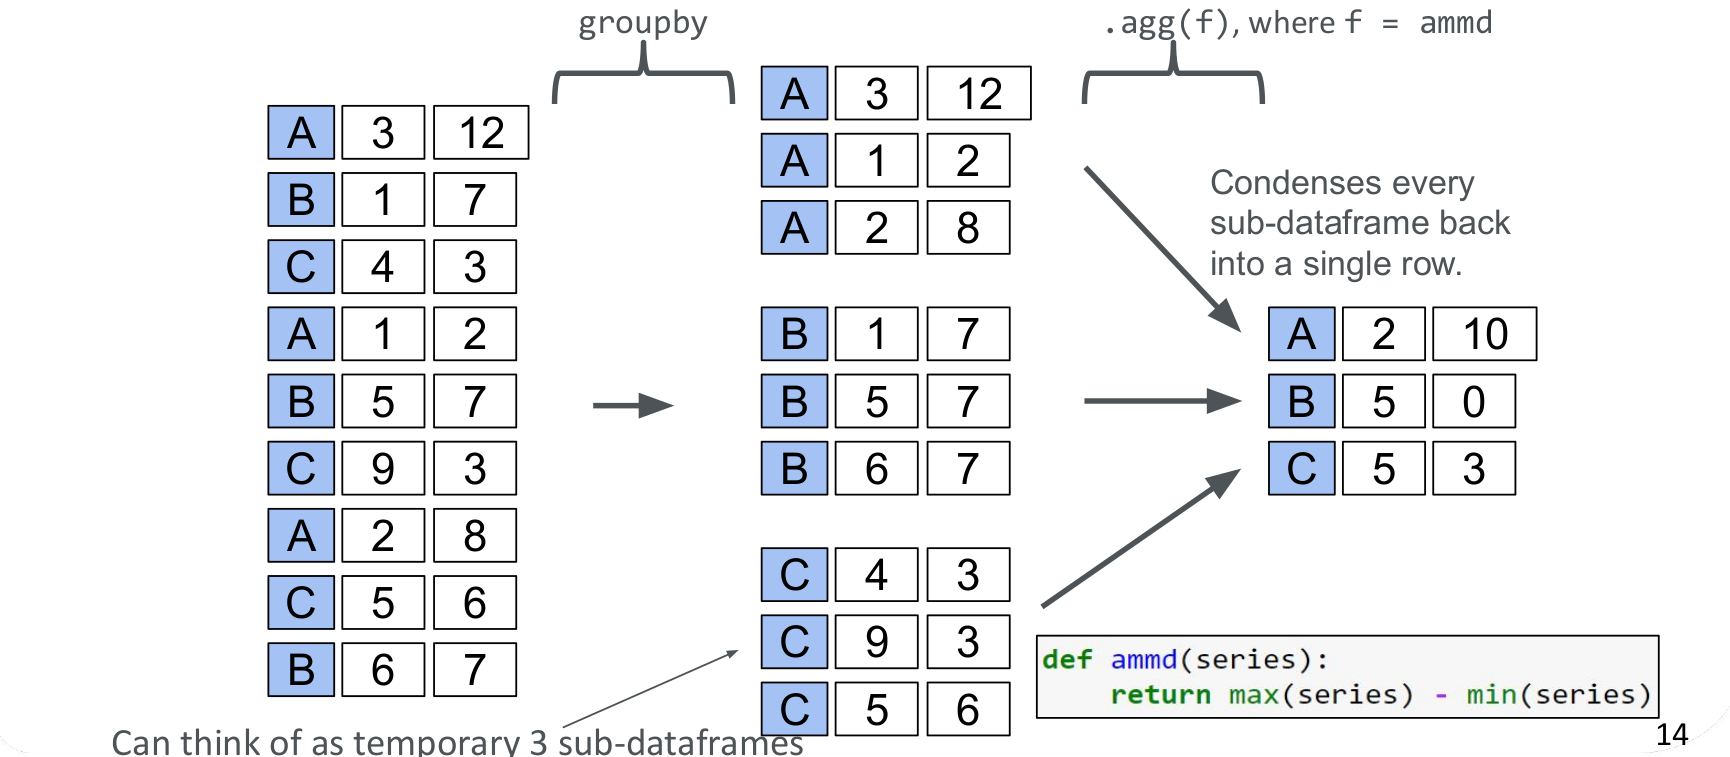

In [ ]:
show_image('./slides/slide91.png', 800, 350)

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups. The groupby function is not very useful. It is typically used with:
- an aggregation function (e.g., `sum`, `mean`)
- a custom aggregation/reducing function
- built-in helper methods (e.g., `describe()`, `hist()`, `value_counts()`).
- For a list of all built-in functions, read [here](https://pandas.pydata.org/docs/reference/groupby.html).
- We will use a few in the remainder of this notebook.

In [ ]:
df = pd.DataFrame(
   {
       "A": [1, 1, 2, 2],
       "B": [1, 2, 3, 4],
       "C": [0.362838, 0.227877, 1.267767, -0.562860],
   }
)
df

,A,B,C
0,1,1,0.362838
1,1,2,0.227877
2,2,3,1.267767
3,2,4,-0.562860


In [ ]:
df.groupby('A').agg('min') #identical to: df.groupby('A').min()

,B,C
A,,
1,1,0.227877
2,3,-0.562860


In [ ]:
df.groupby('A')

Note that the datatype is `DataFrameGroupBy`. Groupby operations on `Series` may also produce `SeriesGroupBy` objects. Most aggregations methods work on both object types (functionality is inherited from `GroupBy` objects) but some methods differ (mostly in that `DataFrameGroupBy` methods allow you to specify the axis argument and often an argument to indicate whether to restrict application to columns of a specific data type.

In [ ]:
print("Group name: group labels ->", df.groupby('A').groups)
print("Group name: group indices ->", df.groupby('A').indices)

Group name: group labels -> {1: [0, 1], 2: [2, 3]}
Group name: group indices -> {1: array([0, 1]), 2: array([2, 3])}


In [ ]:
rtp_table = female_babynames.groupby("Name").agg(ratio_to_peak)
rtp_table

<ipython-input-61-0b5b25773981>:1: FutureWarning:

['State', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Year,Count
Name,,
Aadhira,1.0,0.700000
Aadhya,1.0,0.580000
Aadya,1.0,0.724138
Aahana,1.0,0.192308
Aahna,1.0,1.000000
...,...,...
Zyanya,1.0,0.857143
Zyla,1.0,1.000000
Zylah,1.0,1.000000


In [ ]:
show_image('./slides/quiz1.png', 800, 350)

In [ ]:
female_babynames.query('Name == "Aadhira"')

,State,Sex,Year,Name,Count
220316,CA,F,2017,Aadhira,6
223265,CA,F,2018,Aadhira,10
231321,CA,F,2020,Aadhira,6
234710,CA,F,2021,Aadhira,7


If you're using an early enough version of pandas, the code should work and will automatically drop columns for which `ratio_to_peak` fails, e.g. the Sex column. To avoid warning messages and deprication, we can explicitly only select the `Count` column.

In [ ]:
rtp_table = female_babynames.groupby("Name")[["Count"]].agg(ratio_to_peak)
rtp_table

,Count
Name,
Aadhira,0.700000
Aadhya,0.580000
Aadya,0.724138
Aahana,0.192308
Aahna,1.000000
...,...
Zyanya,0.857143
Zyla,1.000000
Zylah,1.000000


In [ ]:
# this code renames the Count column to RTP.
rtp_table = rtp_table.rename(columns = {"Count": "Count RTP"})
rtp_table

,Count RTP
Name,
Aadhira,0.700000
Aadhya,0.580000
Aadya,0.724138
Aahana,0.192308
Aahna,1.000000
...,...
Zyanya,0.857143
Zyla,1.000000
Zylah,1.000000


In [ ]:
rtp_table.sort_values("Count RTP")

,Count RTP
Name,
Debra,0.001260
Susan,0.002034
Debbie,0.002817
Cheryl,0.003273
Carol,0.003635
...,...
Jovi,1.000000
Neta,1.000000
Doni,1.000000


In [ ]:
fig = px.line(babynames.query("Name == 'Debra' and Sex == 'F'"), x = "Year", y = "Count")
fig.update_layout(font_size = 16)

In [ ]:
top10 = rtp_table.sort_values("Count RTP").head(10).index
top10

Index(['Debra', 'Susan', 'Debbie', 'Cheryl', 'Carol', 'Tammy', 'Terri',
       'Shannon', 'Deborah', 'Carolyn'],
      dtype='object', name='Name')

In [ ]:
fig = px.line(babynames.query("Name in @top10 and Sex == 'F'"), x = "Year", y = "Count", color = "Name")
fig.update_layout(font_size = 13)

---

## Some `groupby.agg` examples

### Puzzle 1: Total babies per baby name
Create a groupby.agg call that gives the total babies born with each name.

In [ ]:
ex1 = female_babynames.groupby("Name")[["Count"]].agg(sum)
ex1.sort_values("Count", ascending=False)

,Count
Name,
Jennifer,175321
Mary,152978
Jessica,135825
Elizabeth,133906
Patricia,116894
...,...
Evangelia,5
Avyana,5
Courtny,5


### Puzzle 2: Total babies per year
Create a `groupby.agg` call that gives total babies born in each year.

In [ ]:
#Identical to: ex2 = female_babynames.groupby("Year")[["Count"]].sum()
ex2 = female_babynames.groupby("Year")[["Count"]].agg(sum)
ex2

,Count
Year,
1910,5950
1911,6602
1912,9804
1913,11860
1914,13815
...,...
2017,195466
2018,189066
2019,183982


In [ ]:
fig = px.line(ex2, y = "Count")
fig.update_layout(font_size = 15)

In [ ]:
#What about relative births?
relative_births = ex2 / max(ex2["Count"])
fig = px.line(relative_births, y = "Count")
fig.update_layout(font_size = 15)

### `groupby.size()`

In [ ]:
#size returns a Series giving the size of each group
female_babynames.groupby('Year').size()

Year
1910     233
1911     251
1912     303
1913     333
1914     368
        ... 
2017    3763
2018    3697
2019    3655
2020    3614
2021    3646
Length: 112, dtype: int64

### `groupby.filter()`


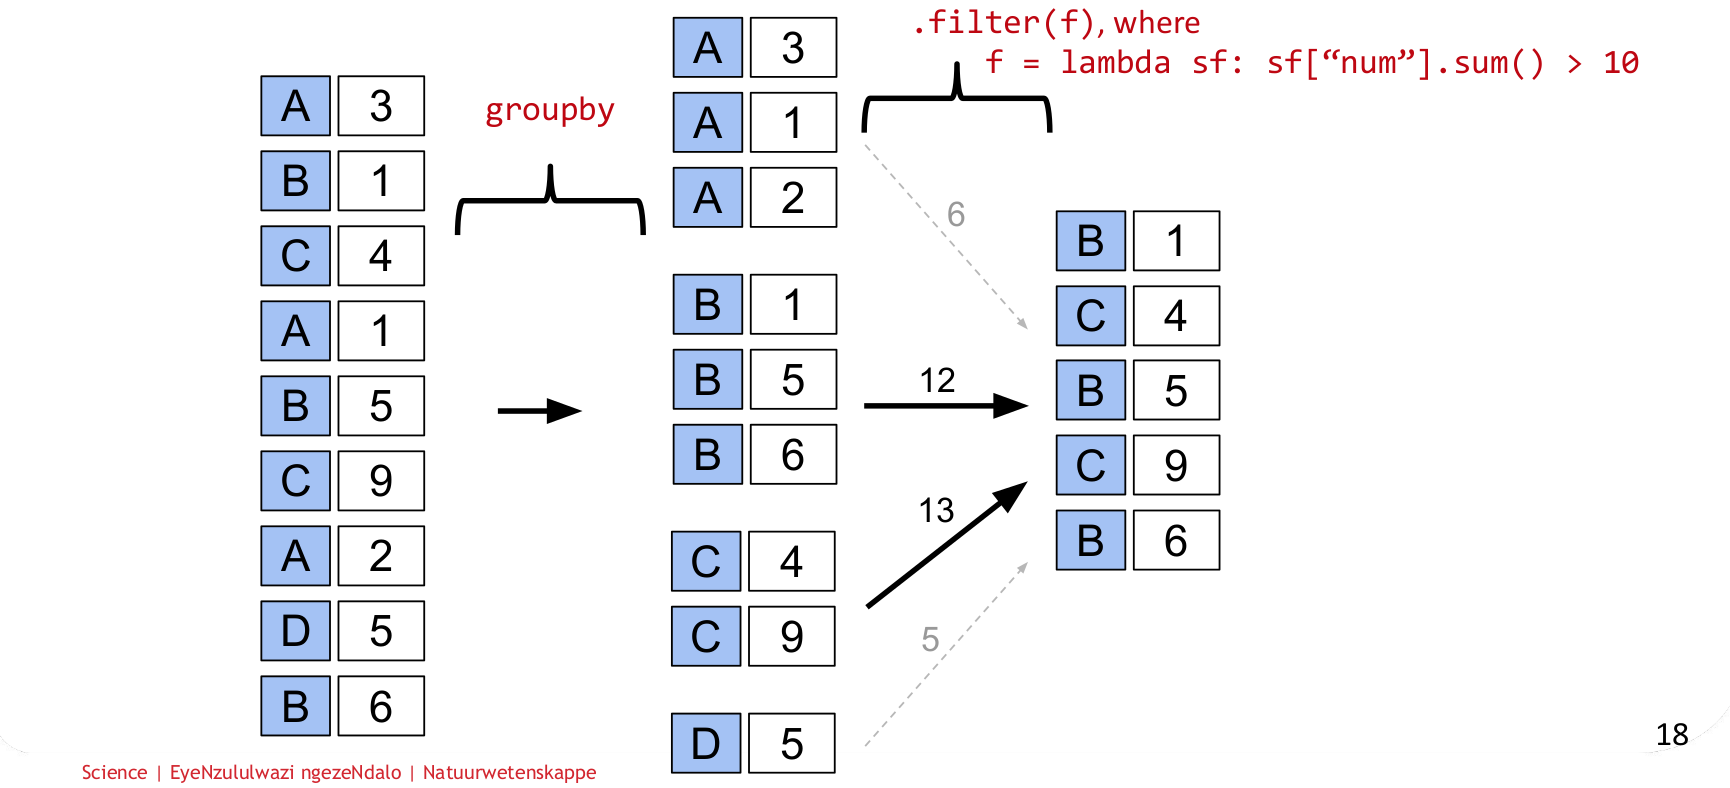

In [ ]:
show_image('./slides/slide93.png', 800, 350)

In [ ]:
# filter gives a copy of the original DataFrame where row r is included
# if its group obeys the given condition
#
# Note: Filtering is done per GROUP, not per ROW.
female_babynames.groupby('Year').filter(lambda sf: sf["Count"].sum() > 7000)

,State,Sex,Year,Name,Count
742,CA,F,1912,Evalyn,6
745,CA,F,1912,Lenora,6
746,CA,F,1912,Lillie,6
743,CA,F,1912,Janice,6
686,CA,F,1912,Tillie,9
...,...,...,...,...,...
235340,CA,F,2021,An,5
232380,CA,F,2021,Adelyn,144
232496,CA,F,2021,Ailani,99
232501,CA,F,2021,Dayana,98


In [ ]:
# the code below lets us peek into the groups and see why they were rejected or not
for i, (n, g) in enumerate(female_babynames.groupby("Year")):
    print(n)
    display(g)
    print(g["Count"].sum())
    if i>3: break

1910


,State,Sex,Year,Name,Count
1,CA,F,1910,Helen,239
83,CA,F,1910,Nellie,20
184,CA,F,1910,Aileen,6
186,CA,F,1910,Astrid,6
187,CA,F,1910,Beulah,6
...,...,...,...,...,...
118,CA,F,1910,Rita,12
67,CA,F,1910,Vera,25
9,CA,F,1910,Elizabeth,93
68,CA,F,1910,Alma,24


5950
1911


,State,Sex,Year,Name,Count
395,CA,F,1911,Victoria,9
397,CA,F,1911,Consuelo,8
376,CA,F,1911,Madeline,11
424,CA,F,1911,Mercedes,7
241,CA,F,1911,Marie,103
...,...,...,...,...,...
357,CA,F,1911,May,13
290,CA,F,1911,Ellen,30
465,CA,F,1911,Jeannette,5
292,CA,F,1911,Clara,29


6602
1912


,State,Sex,Year,Name,Count
742,CA,F,1912,Evalyn,6
745,CA,F,1912,Lenora,6
746,CA,F,1912,Lillie,6
743,CA,F,1912,Janice,6
686,CA,F,1912,Tillie,9
...,...,...,...,...,...
549,CA,F,1912,Julia,37
648,CA,F,1912,Cecelia,12
646,CA,F,1912,Adeline,12
548,CA,F,1912,Maria,38


9804
1913


,State,Sex,Year,Name,Count
1009,CA,F,1913,Leah,9
814,CA,F,1913,Jean,93
905,CA,F,1913,Audrey,24
900,CA,F,1913,Jeanne,26
949,CA,F,1913,Cora,15
...,...,...,...,...,...
858,CA,F,1913,Julia,44
855,CA,F,1913,Maria,45
880,CA,F,1913,Emily,33
850,CA,F,1913,Ellen,47


11860
1914


,State,Sex,Year,Name,Count
1267,CA,F,1914,Elvira,20
1450,CA,F,1914,Delfina,5
1409,CA,F,1914,Rachel,7
1440,CA,F,1914,Shizuko,6
1442,CA,F,1914,Yolanda,6
...,...,...,...,...,...
1166,CA,F,1914,Vivian,69
1256,CA,F,1914,Lupe,23
1132,CA,F,1914,Mildred,186
1273,CA,F,1914,Jeannette,19


13815


### Puzzle 3: Pitfalls

In [ ]:
elections = pd.read_csv("./data/elections.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
103,1948,Strom Thurmond,Dixiecrat,1175930,loss,2.412304
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
60,1904,Theodore Roosevelt,Republican,7630557,win,56.562787


We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson successfully ran for election in 2020. Why is this happening?

In [ ]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2020,Woodrow Wilson,81268924,win,61.344703


### Puzzle 4: Best election results
The following code produces the _the best result by each party_. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results.

In [ ]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.head(5)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326


In [ ]:
elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0]).head(9)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


In [ ]:
elections_sorted_by_percent = elections.sort_values("%", ascending=False)
elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0]).head(9)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2008,Chuck Baldwin,199750,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,1964,Lyndon Johnson,43127041,win,61.344703


You'll soon discover that with Pandas' rich tool set, there's typically more than one way to get to the same answer. Each approach has different tradeoffs in terms of readability, performance, memory consumption, complexity and more.  It will take some experience for you to develop a sense of which approach is better for each problem, but you should in general try to think if you can at least envision a different solution to a given problem, especially if you find your current solution to be particularly convoluted or hard to read.

Here are a couple of other ways of obtaining the same result (in each case we only show the top part with `head()`).  The first approach uses `groupby` but finds the location of the maximum value via the `idxmax()` method (look up its documentation!).  We then index and sort by party to match the requested formatting:

In [ ]:
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [ ]:
elections.groupby('Party')['%'].idxmax()

Party
American                  22
American Independent     115
Anti-Masonic               6
Anti-Monopoly             38
Citizens                 127
Communist                 89
Constitution             164
Constitutional Union      24
Democratic               114
Democratic-Republican      0
Dixiecrat                103
Farmer–Labor              78
Free Soil                 15
Green                    155
Greenback                 35
Independent              143
Liberal Republican        31
Libertarian              175
National Democratic       50
National Republican        3
National Union            27
Natural Law              148
New Alliance             136
Northern Democratic       26
Populist                  48
Progressive               68
Prohibition               49
Reform                   150
Republican               120
Socialist                 66
Southern Democratic       25
States' Rights           110
Taxpayers                147
Union                     93
Union La

In [ ]:
best_per_party = elections.loc[elections.groupby('Party')['%'].idxmax()]  # This is the computational part
best_per_party.set_index('Party').sort_index().head()  # This indexes by Party to match the formatting above

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182


And this one doesn't even use `groupby`! This approach instead uses the `drop_duplicates` method to keep only the last occurrence of of each party after having sorted by "%", which is the best performance.  Again, the 2nd line is purely formatting:

In [ ]:
best_per_party2 = elections.sort_values('%').drop_duplicates(['Party'], keep='last')
best_per_party2.set_index('Party').sort_index().head()  # Formatting

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1856,Millard Fillmore,873053,loss,21.554001
American Independent,1968,George Wallace,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
